# 予備実験
## 目的
- TIMITにおける音素と量子化表現（２次元）の共起関係を調べる
- 各潜在表現が特定の音素に対して特異的に反応することを検証する

In [40]:
import sys
sys.path.append("../")
from data import TIMITDataset, get_dataloader
from quantizer import Quantizer
from collections import defaultdict
import pickle
import torch

In [41]:
dataset = TIMITDataset("train")
dataloader = get_dataloader(dataset, batch_size=1, shuffle=False)

Using custom data configuration default-7dc5a6ddcdc99305
Found cached dataset timit (/home/shibutani/fs/.cache/huggingface/datasets/timit/default-7dc5a6ddcdc99305/0.0.0/e393649805e8c068eb5c3311baf236f53ffa81289ecc57e285c6e06a31f00ba8)
#0:   0%|          | 0/1155 [00:00<?, ?ex/s]





#0:   0%|          | 1/1155 [00:01<34:32,  1.80s/ex]


#0:   2%|▏         | 20/1155 [00:01<01:18, 14.51ex/s]


#0:   4%|▎         | 43/1155 [00:01<00:31, 35.00ex/s]


#0:   6%|▌         | 67/1155 [00:02<00:18, 59.49ex/s]


#0:   8%|▊         | 92/1155 [00:02<00:12, 86.91ex/s]


#0:  10%|█         | 116/1155 [00:02<00:09, 112.73ex/s]


#0:  12%|█▏        | 142/1155 [00:02<00:07, 140.92ex/s]


#0:  14%|█▍        | 166/1155 [00:02<00:06, 162.11ex/s]

#0:  16%|█▋        | 190/1155 [00:02<00:05, 180.55ex/s]


#0:  19%|█▊        | 214/1155 [00:02<00:04, 194.77ex/s]


#0:  21%|██        | 239/1155 [00:02<00:04, 206.91ex/s]


#0:  23%|██▎       | 264/1155 [00:02<00:04, 217.15ex/s]


#0:  27%|██▋       | 312/1155 [

In [42]:
target_phonemes = set(
    ["aa",
    "ae",
    "ah",
    "aw",
    "ay",
    "b",
    "ch",
    "d",
    "dh",
    "dx",
    "eh",
    "axr",
    "ey",
    "f",
    "g",
    "bcl",
    "hh",
    "ih",
    "iy",
    "jh",
    "k",
    "el",
    "em",
    "en",
    "eng",
    "ow",
    "oy",
    "p",
    "r",
    "s",
    "sh",
    "t",
    "th",
    "uh",
    "uw",
    "v",
    "w",
    "y",
    "z",]
)

In [43]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
quantizer = Quantizer(DEVICE)

In [60]:
# フレーム割当テスト
tmp_dataloader = get_dataloader(dataset, batch_size=1, shuffle=False)
bidx, bx, bx_len, by, by_len, texts, phonetic_details = next(iter(tmp_dataloader))
bx = bx.to(DEVICE)
bquantized_indices = quantizer.quantize(bx)
print(f"入力から計算された総時間: {bx_len[0] / 16000:.2f}秒")
print(f"量子化表現から計算された総時間: {len(bquantized_indices[0]) * 0.02 + 0.005:.2f}秒")
# 各量子化表現の開始時刻と終了時刻を計算する
quantized_indices_start_end = []
for i in range(len(bquantized_indices[0])):
    quantized_indices_start_end.append([i * 0.02, (i + 1) * 0.02])
# 各量子化表現ごとに対応するphonemeを計算する
quantized_indices_phoneme = [[] for _ in range(len(bquantized_indices[0]))]
for i in range(len(bquantized_indices[0])):
    phonetic_detail = phonetic_details[0]
    for j in range(len(phonetic_detail["start_sec"])):
        # 右側に包含する
        if phonetic_detail["start_sec"][j] <= quantized_indices_start_end[i][0] <= phonetic_detail["stop_sec"][j]:
            quantized_indices_phoneme[i].append(phonetic_detail["utterance"][j])
        # 左側に包含する
        elif phonetic_detail["start_sec"][j] <= quantized_indices_start_end[i][1] <= phonetic_detail["stop_sec"][j]:
            quantized_indices_phoneme[i].append(phonetic_detail["utterance"][j])
        # 両側に包含する
        elif quantized_indices_start_end[i][0] <= phonetic_detail["start_sec"][j] and phonetic_detail["stop_sec"][j] <= quantized_indices_start_end[i][1]:
            quantized_indices_phoneme[i].append(phonetic_detail["utterance"][j])
        # break条件
        elif quantized_indices_start_end[i][1] < phonetic_detail["start_sec"][j]:
            break

tensor([[107,  10],
        [107, 196],
        [107, 196],
        [166, 196],
        [107, 196],
        [107,  82],
        [107,  82],
        [107, 196],
        [166, 196],
        [  1,   4],
        [213,   3],
        [229,  47],
        [ 96, 197],
        [189, 304],
        [313, 304],
        [112,  70],
        [297, 252],
        [104, 219],
        [ 20,  46],
        [189,  46],
        [139,  85],
        [150, 299],
        [150, 135],
        [150, 135],
        [297, 135],
        [297, 153],
        [104, 301],
        [103, 190],
        [185,  28],
        [ 35, 116],
        [213,   3],
        [253,  16],
        [176,  48],
        [ 60, 291],
        [227, 239],
        [234, 190],
        [271, 190],
        [ 42, 296],
        [ 42, 221],
        [ 75, 163],
        [180, 256],
        [180, 142],
        [ 45, 263],
        [ 45, 108],
        [317, 108],
        [103, 172],
        [215, 226],
        [166, 196],
        [166,  10],
        [162, 238],


In [78]:
def dd1 ():
    return 0
def dd2 ():
    return defaultdict(dd1)

quantized_indices_counter = defaultdict(dd1)
quantized_indices_phoneme_counter = defaultdict(dd2)

total_size = len(dataset)
count = 0
# 基本的にbatch_size=1で計算する
for bidx, bx, bx_len, by, by_len, texts, phonetic_details in dataloader:
    count += 1
    if count % 100 == 0:
        print(f"progress: {count / total_size * 100:.2f}%", end="\r")
    bx = bx.to(DEVICE)
    bquantized_indices = quantizer.quantize(bx)
    quantized_indices = bquantized_indices[0]
    # 入力から計算された総時間:
    time_from_input = bx_len[0] / 16000
    # 量子化表現から計算された総時間:
    time_from_quantized_indices = len(quantized_indices) * 0.02 + 0.005
    if abs(time_from_input - time_from_quantized_indices) > 0.1:
        print(f"入力から計算された総時間: {time_from_input:.2f}秒")
        print(f"量子化表現から計算された総時間: {time_from_quantized_indices:.2f}秒")
        print("時間が一致しません")
    # 各量子化表現の開始時刻と終了時刻を計算する
    quantized_indices_start_end = []
    for i in range(len(quantized_indices)):
        quantized_indices_start_end.append([i * 0.02, (i + 1) * 0.02])
    # 各量子化表現ごとに対応するphonemeを計算する
    quantized_indices_phoneme = [[] for _ in range(len(quantized_indices))]
    phonetic_detail = phonetic_details[0]
    for i in range(len(quantized_indices)):
        for j in range(len(phonetic_detail["start_sec"])):
            # 右側に包含する
            if phonetic_detail["start_sec"][j] <= quantized_indices_start_end[i][0] <= phonetic_detail["stop_sec"][j]:
                quantized_indices_phoneme[i].append(phonetic_detail["utterance"][j])
            # 左側に包含する
            elif phonetic_detail["start_sec"][j] <= quantized_indices_start_end[i][1] <= phonetic_detail["stop_sec"][j]:
                quantized_indices_phoneme[i].append(phonetic_detail["utterance"][j])
            # 両側に包含する
            elif quantized_indices_start_end[i][0] <= phonetic_detail["start_sec"][j] and phonetic_detail["stop_sec"][j] <= quantized_indices_start_end[i][1]:
                quantized_indices_phoneme[i].append(phonetic_detail["utterance"][j])
            # break条件
            elif quantized_indices_start_end[i][1] < phonetic_detail["start_sec"][j]:
                break
        quantized_idx = quantized_indices[i]
        tuple_quantized_idx = tuple(quantized_idx.tolist())
        quantized_indices_counter[tuple_quantized_idx] += 1
        for phoneme in quantized_indices_phoneme[i]:
            # phoneme: str
            if phoneme in target_phonemes:
                quantized_indices_phoneme_counter[tuple_quantized_idx][phoneme] += 1




In [79]:
# calculate P(phoneme|quantized_idx)
p_phoneme_quantized_idx = defaultdict(dd2)
for quantized_idx, phoneme_counter in quantized_indices_phoneme_counter.items():
    total_count = sum(phoneme_counter.values())
    for phoneme, count in phoneme_counter.items():
        p_phoneme_quantized_idx[quantized_idx][phoneme] = count / total_count

In [80]:
# 各音素のy-axisにおける並び位置を決める
target_phonemes_list = sorted(list(target_phonemes))
phoneme_order = {phoneme: i for i, phoneme in enumerate(target_phonemes_list)}
# 各音素のx-axisにおける並び位置を決める
quantize_idx_order = {quantize_idx: i for i, quantize_idx in enumerate(p_phoneme_quantized_idx.keys())}
for key in p_phoneme_quantized_idx.keys():
    # calculate most probable phoneme
    # 最も確率の高い音素に合わせて位置を決定
    phoneme = max(p_phoneme_quantized_idx[key].items(), key=lambda x: x[1])[0]
    order = phoneme_order[phoneme]
    quantize_idx_order[key] = order

In [83]:
sorted_quantize_idx = sorted(quantize_idx_order.items(), key=lambda x: x[1])
sorted_quantize_idx = [x[0] for x in sorted_quantize_idx]

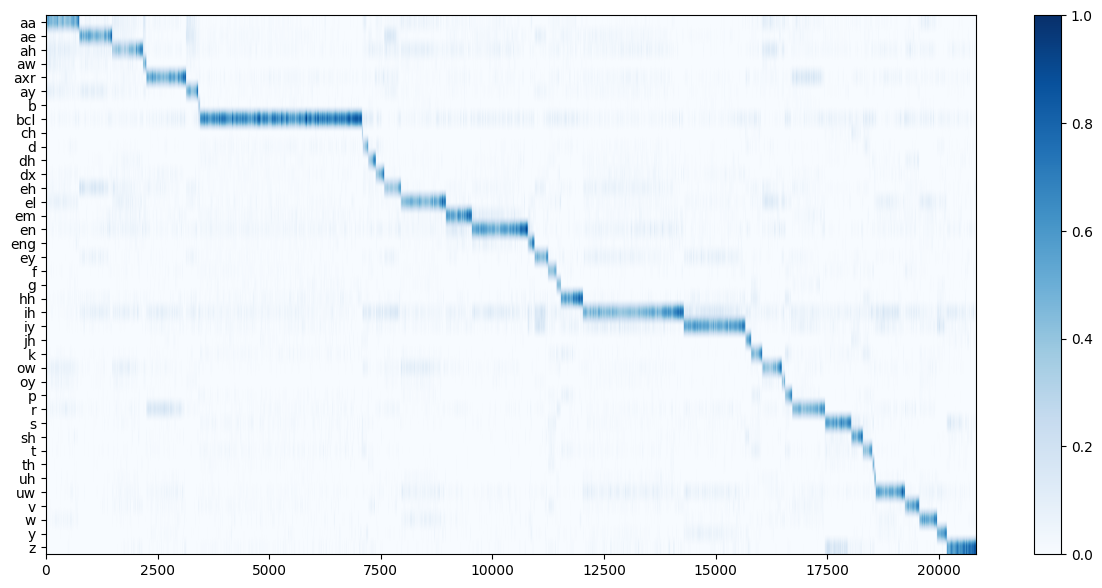

In [82]:
y_axis = target_phonemes_list
x_axis = sorted_quantize_idx
# plot heat map
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
grid = [[p_phoneme_quantized_idx[x][y] for x in x_axis] for y in y_axis]
ax.imshow(grid, cmap="Blues", aspect='auto')
# show all of ylabels
ax.set_yticks(range(len(y_axis)))
ax.set_yticklabels(y_axis)
# show color bar
fig.colorbar(ax.imshow(grid, cmap="Blues", aspect='auto'))